In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


In [ ]:
df = pd.read_csv("Covid-19 Dataset.csv")

In [ ]:
df.shape

(5434, 21)

In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [ ]:
df.head(6)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
5,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes


In [ ]:
# create a table with data missing
missing_values = df.isnull().sum()
percent_missing = (missing_values / len(df)) * 100

frame = pd.DataFrame({
    'missing_values': missing_values,
    'percent_missing': percent_missing
})
frame

,missing_values,percent_missing
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


In [ ]:
selected_columns = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat','Abroad travel','COVID-19']
subset_df = df.loc[40:50, selected_columns]
print(subset_df)


   Breathing Problem Fever Dry Cough Sore throat Abroad travel COVID-19
40               Yes   Yes       Yes         Yes            No      Yes
41               Yes   Yes       Yes          No           Yes      Yes
42               Yes   Yes       Yes         Yes            No      Yes
43               Yes   Yes       Yes         Yes           Yes      Yes
44               Yes   Yes       Yes         Yes           Yes      Yes
45               Yes   Yes       Yes          No            No      Yes
46               Yes   Yes       Yes          No            No      Yes
47               Yes   Yes       Yes          No           Yes      Yes
48               Yes   Yes       Yes         Yes            No      Yes
49               Yes   Yes       Yes         Yes            No      Yes
50               Yes   Yes       Yes         Yes            No      Yes


In [ ]:
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [
    'Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
    'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
    'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
    'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
    'Attended Large Gathering', 'Visited Public Exposed Places',
    'Family working in Public Exposed Places', 'Wearing Masks',
    'Sanitization from Market', 'COVID-19'
]

# Loop through columns and apply encoding
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [ ]:
df.head(6)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


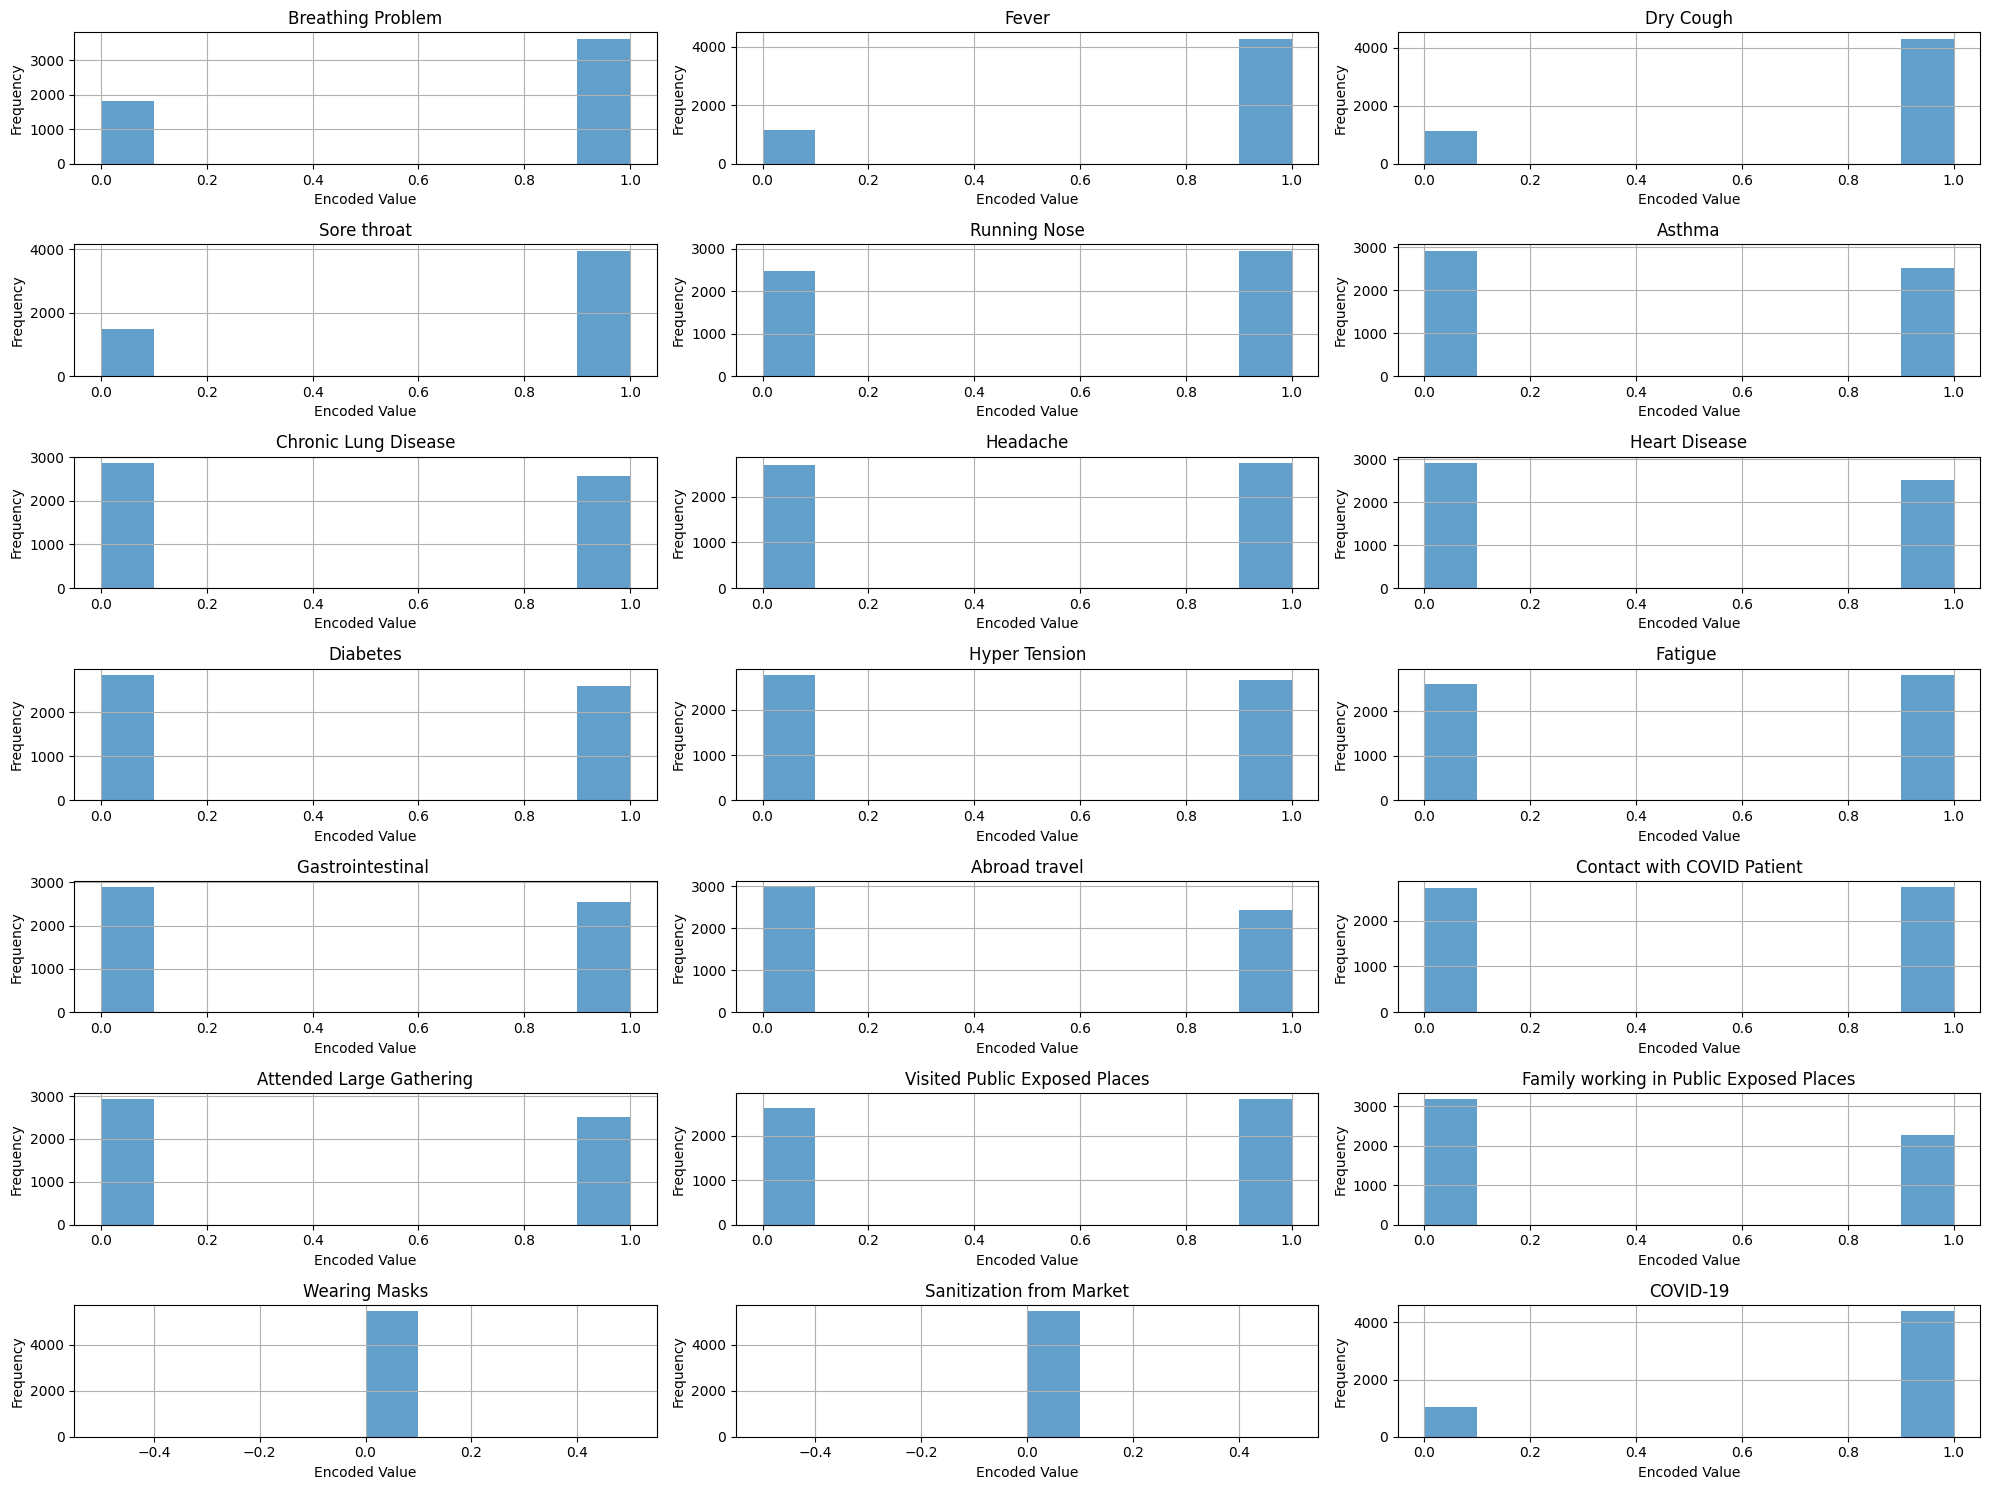

In [ ]:
# List of columns to plot
columns_to_plot = [
    'Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
    'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
    'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
    'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
    'Attended Large Gathering', 'Visited Public Exposed Places',
    'Family working in Public Exposed Places', 'Wearing Masks',
    'Sanitization from Market', 'COVID-19']

# Create a figure and axes
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 15))

# Loop through columns and plot histograms
for ax, column in zip(axes.flatten(), columns_to_plot):
    df[column].hist(ax=ax, bins=10, alpha=0+.7)
    ax.set_title(column)
    ax.set_xlabel('Encoded Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df=df.drop('Wearing Masks',axis=1)
df=df.drop('Sanitization from Market',axis=1)

In [ ]:
# Calculate the correlation matrix
correlation_with_covid19 = df.corr()['COVID-19']

# Display the correlation with 'COVID-19' column
print(correlation_with_covid19)

Breathing Problem                          0.443764
Fever                                      0.352891
Dry Cough                                  0.464292
Sore throat                                0.502848
Running Nose                              -0.005657
Asthma                                     0.089930
Chronic Lung Disease                      -0.056837
Headache                                  -0.027793
Heart Disease                              0.027072
Diabetes                                   0.040627
Hyper Tension                              0.102575
Fatigue                                   -0.044188
Gastrointestinal                          -0.003367
Abroad travel                              0.443875
Contact with COVID Patient                 0.357122
Attended Large Gathering                   0.390145
Visited Public Exposed Places              0.119755
Family working in Public Exposed Places    0.160208
COVID-19                                   1.000000
Name: COVID-

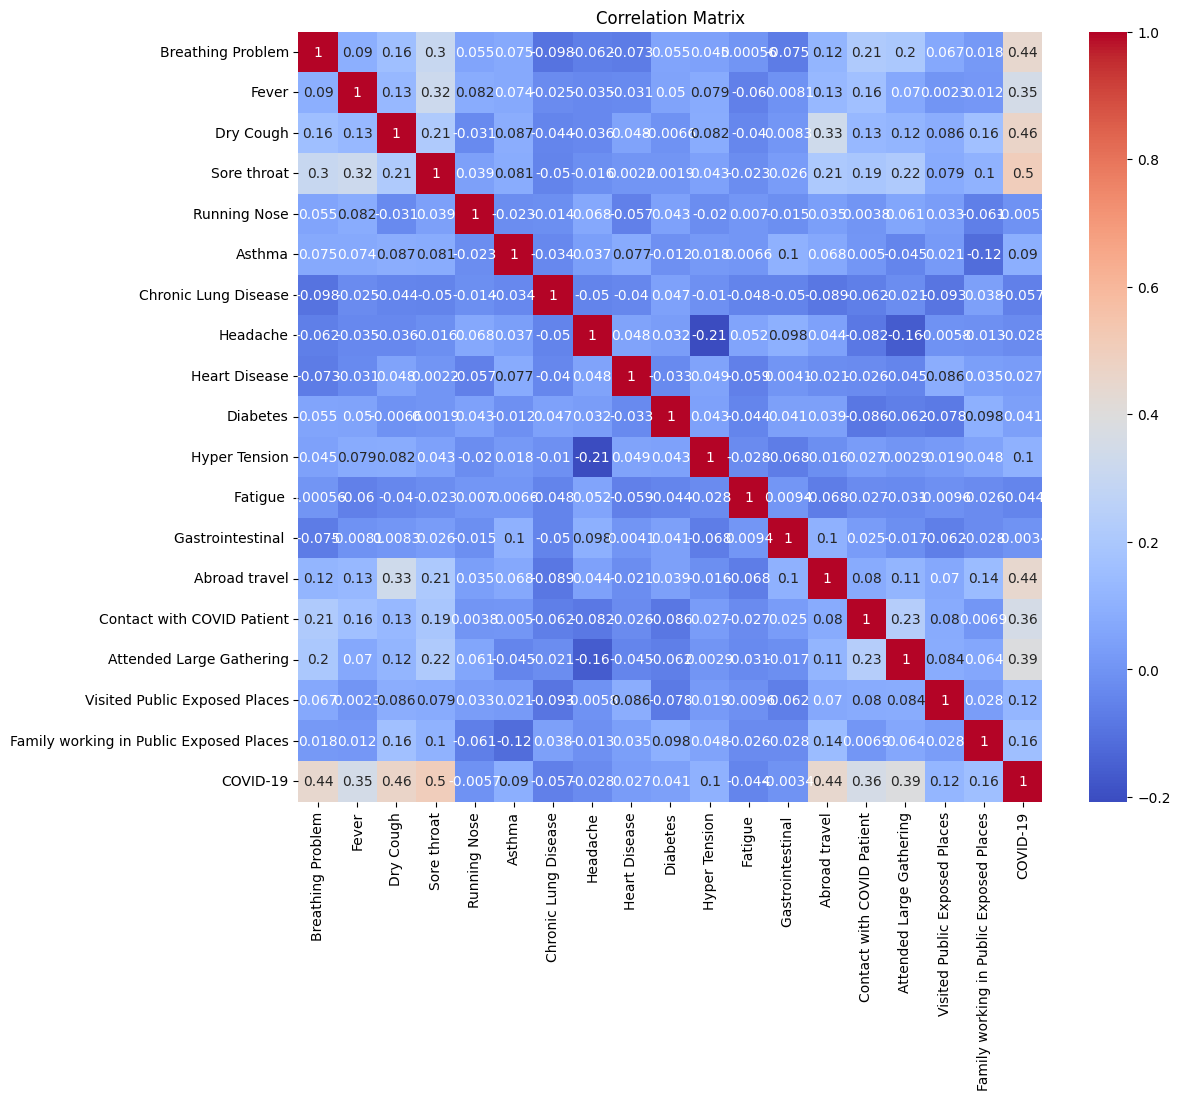

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

# Save the image
plt.savefig("correlation_matrix_heatmap1.png")

# Display the heatmap
plt.show()


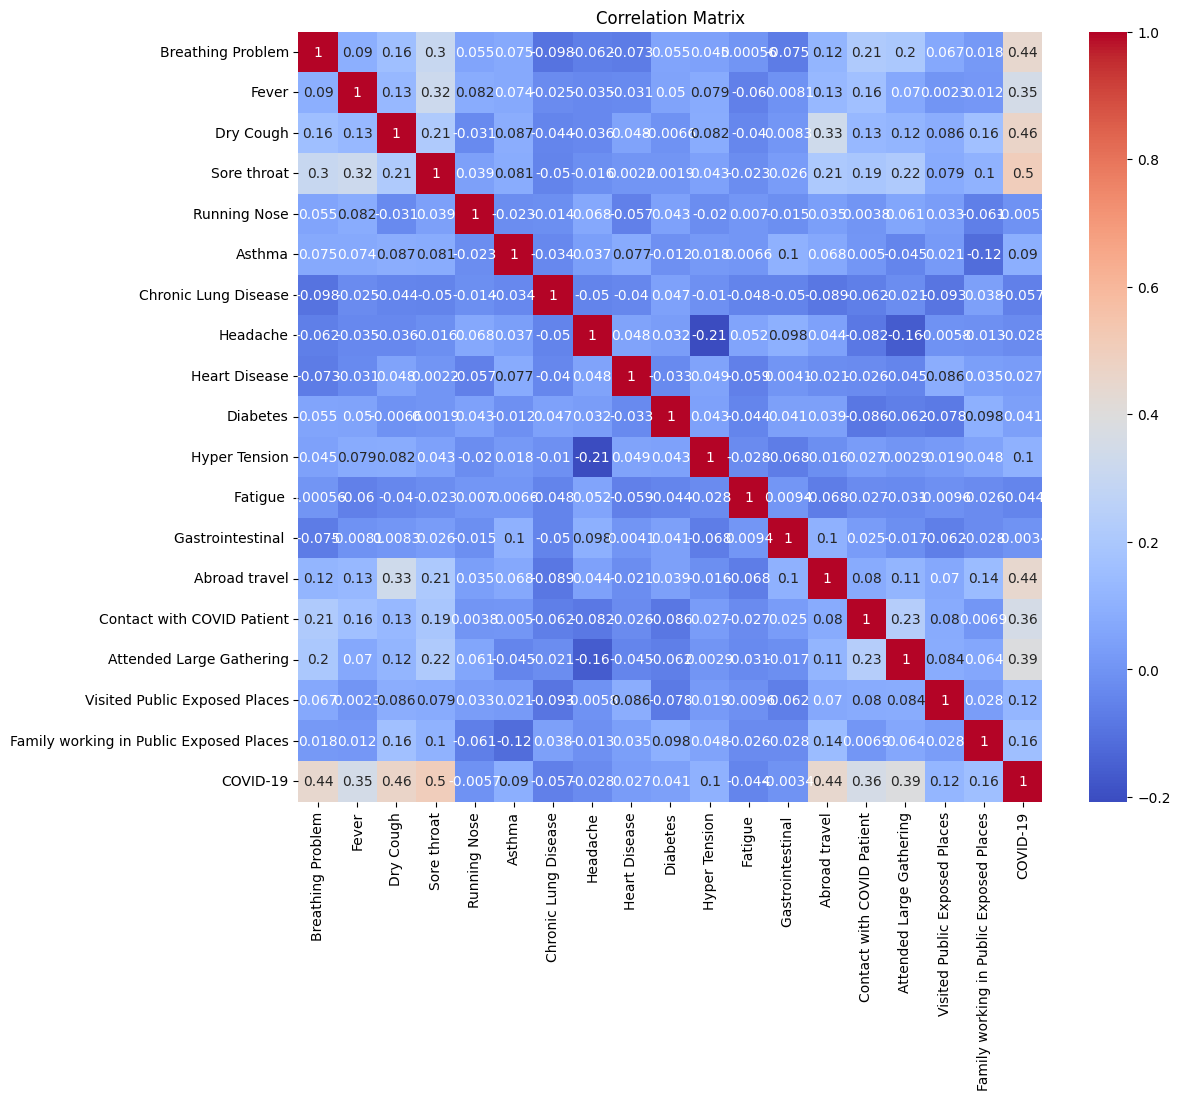

<Figure size 640x480 with 0 Axes>

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
plt.savefig('corelation.png')

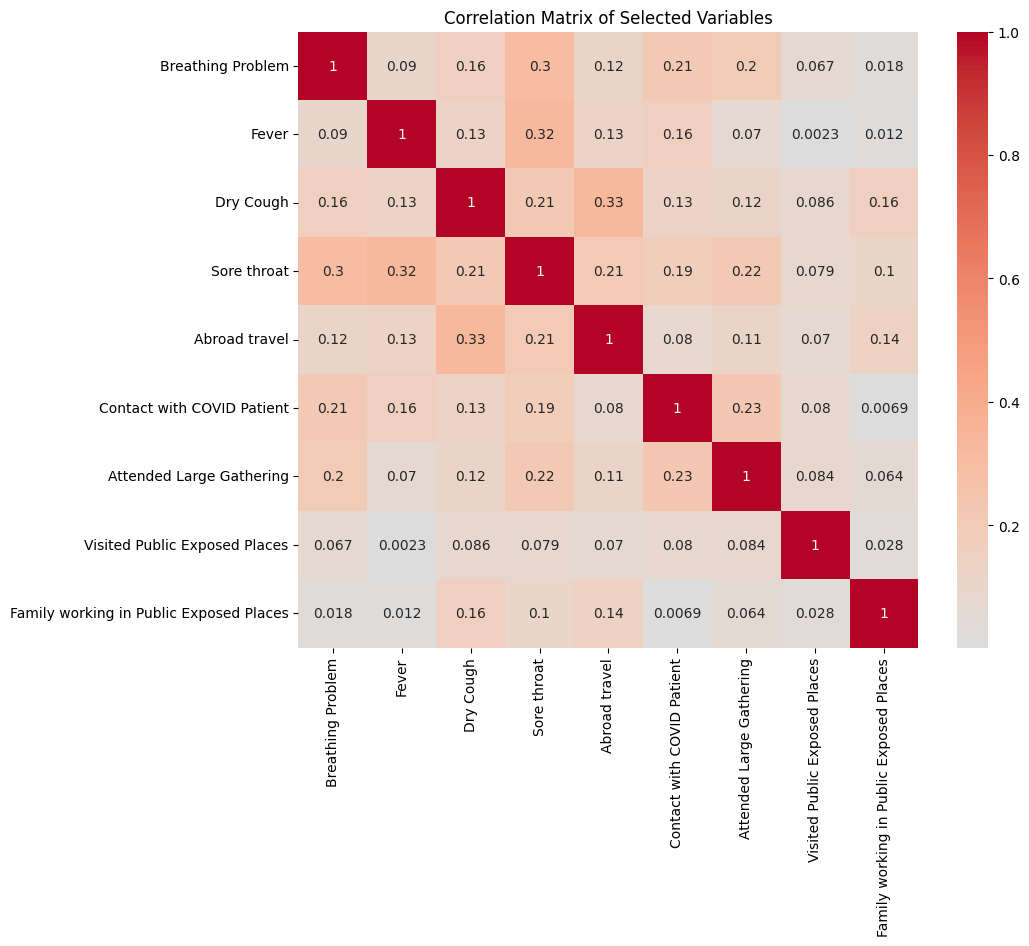

In [ ]:
# Subset of columns to focus on
selected_columns = [
    'Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
    'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering',
    'Visited Public Exposed Places', 'Family working in Public Exposed Places'
]

# Create a subset DataFrame with selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Variables')

# Save the image
plt.savefig('selected_variables_correlation_matrix.png')

# Display the heatmap
plt.show()

In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [ ]:
df=df.drop('Asthma',axis=1)
df=df.drop('Chronic Lung Disease',axis=1)
df=df.drop('Heart Disease',axis=1)
df=df.drop('Diabetes',axis=1)
df=df.drop('Hyper Tension',axis=1)
df=df.drop('Fatigue ',axis=1)
df=df.drop('Gastrointestinal ',axis=1)


In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Headache', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Headache', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [ ]:
df.shape


(5434, 12)

In [ ]:
# Separate features and target variable
X = df.drop(columns=['COVID-19'])
y = df['COVID-19']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.shape

(5434, 12)

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.3 MB/s eta 0:00:00


**Logistic Regression**

Accuracy: 0.9724011039558418
Specificity: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       203
           1       0.98      0.99      0.98       884

    accuracy                           0.97      1087
   macro avg       0.97      0.94      0.95      1087
weighted avg       0.97      0.97      0.97      1087



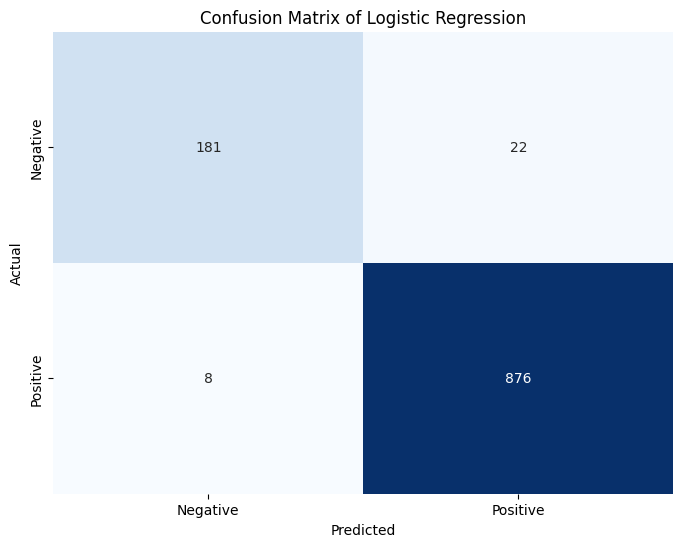

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have your dataset loaded as X (features) and y (target)
# X should contain your selected columns

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f"Specificity: {specificity:.2f}")

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


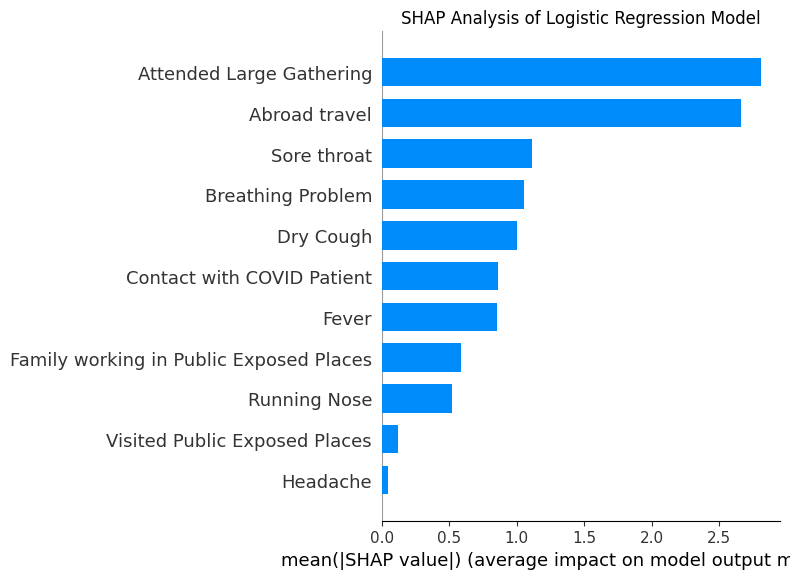

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Instantiate the SHAP explainer for the trained model
explainer = shap.Explainer(logreg_model, X_train)

# Calculate SHAP values for a set of samples (e.g., the first 10 samples)
sample_indices = list(range(10))
shap_values = explainer.shap_values(X_test.iloc[sample_indices])

# Plot the SHAP values for the first sample
plt.title("SHAP Analysis of Logistic Regression Model")  # Add a title to the plot
shap.summary_plot(shap_values, X_test.iloc[sample_indices], feature_names=X.columns, plot_type="bar")

# Show the plot
plt.show()

plt.savefig('LR models.png')

**Random Forest Classifiers**

Accuracy: 0.9779208831646734
Confusion Matrix:
[[188  15]
 [  9 875]]


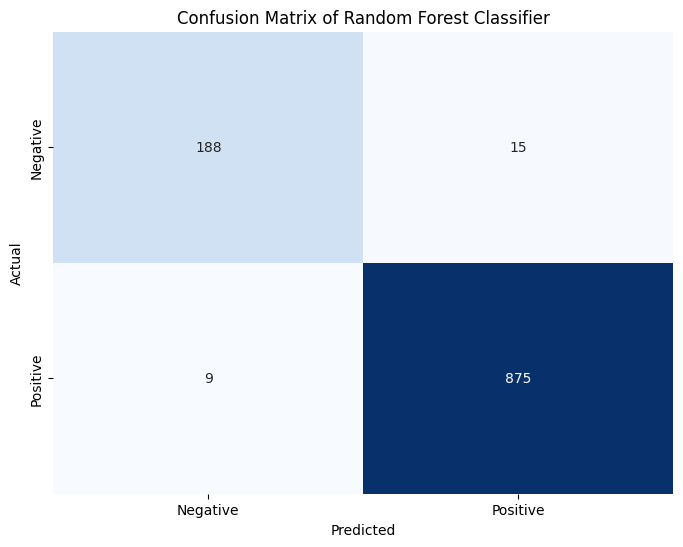

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have your dataset loaded as X (features) and y (target)
# X should contain your selected columns

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest classifier
model_Rf = RandomForestClassifier(random_state=42)

# Train the model
model_Rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_Rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()



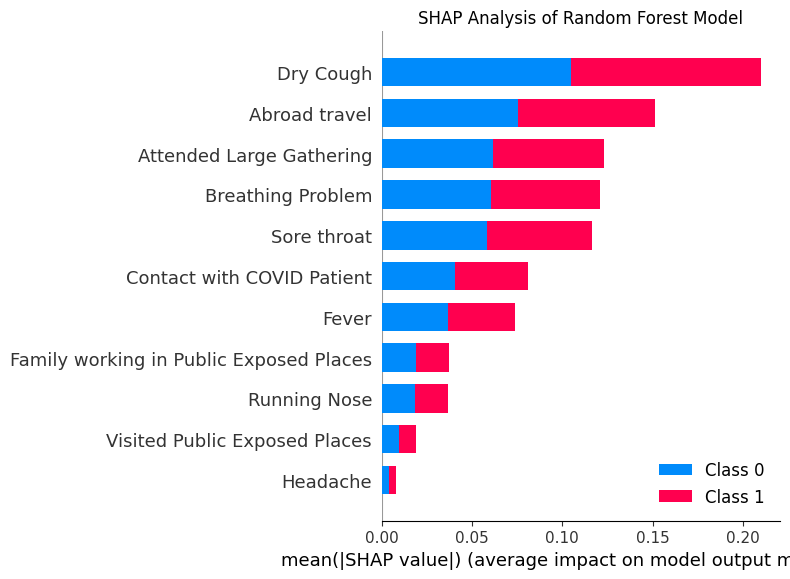

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Instantiate the SHAP explainer for the trained model
explainer = shap.Explainer(model_Rf, X_train)

# Calculate SHAP values for a set of samples (e.g., the first 10 samples)
sample_indices = list(range(10))
shap_values = explainer.shap_values(X_test.iloc[sample_indices])

# Plot the SHAP values for the first sample
plt.title("SHAP Analysis of Random Forest Model")  # Add a title to the plot
shap.summary_plot(shap_values, X_test.iloc[sample_indices], feature_names=X.columns, plot_type="bar")

# Show the plot
plt.show()

plt.savefig('RR models.png')

**Support Vector Machine Classifiers**

Confusion Matrix:
[[188  15]
 [ 12 872]]


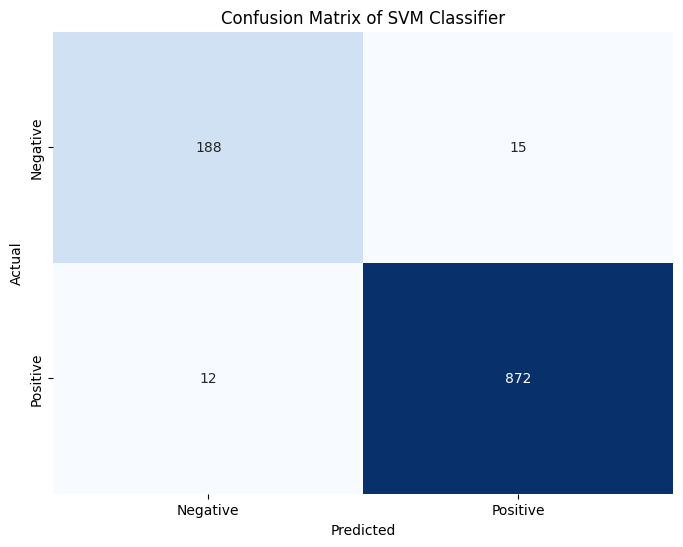

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have your dataset loaded as X (features) and y (target)
# X should contain your selected columns

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SVC classifier
model_SVC = SVC()

# Train the model
model_SVC.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_SVC.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM Classifier')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


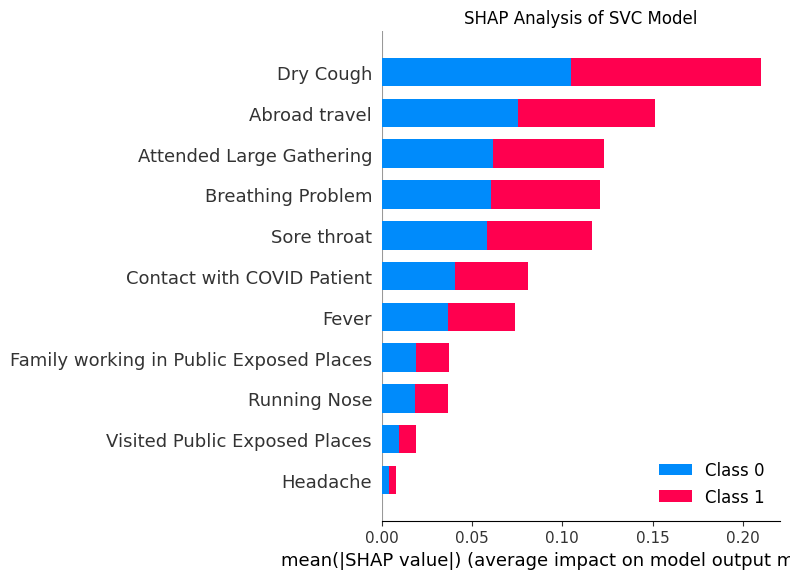

In [ ]:
import shap
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a surrogate model (e.g., RandomForest) to mimic the behavior of SVC
surrogate_model = RandomForestClassifier(random_state=42)
surrogate_model.fit(X_train, y_train)

# Instantiate the SHAP explainer for the surrogate model
explainer = shap.Explainer(surrogate_model, X_train)

# Calculate SHAP values for a set of samples (e.g., the first 10 samples)
sample_indices = list(range(10))
shap_values = explainer.shap_values(X_test.iloc[sample_indices])

# Plot the SHAP values for the first sample
plt.title("SHAP Analysis of SVC Model")
shap.summary_plot(shap_values, X_test.iloc[sample_indices], feature_names=X.columns, plot_type="bar")

**Naive Bayes Classifiers**

Confusion Matrix:
[[203   0]
 [243 641]]


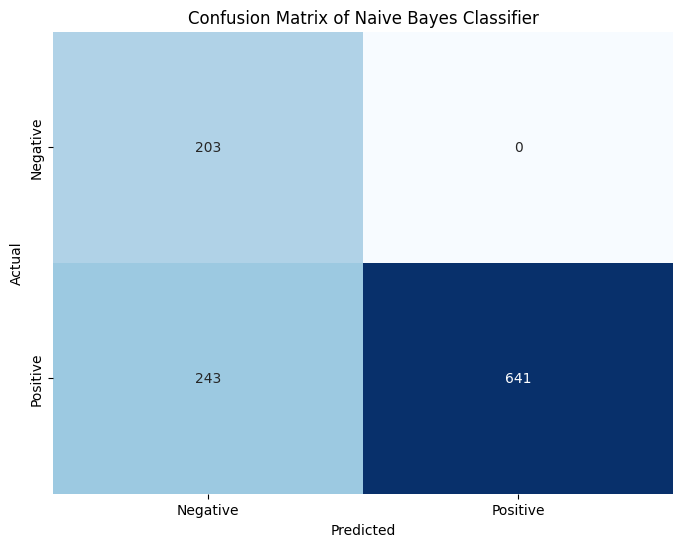

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have your dataset loaded as X (features) and y (target)
# X should contain your selected columns

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gaussian Naive Bayes classifier
model_NB = GaussianNB()

# Train the model
model_NB.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_NB.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


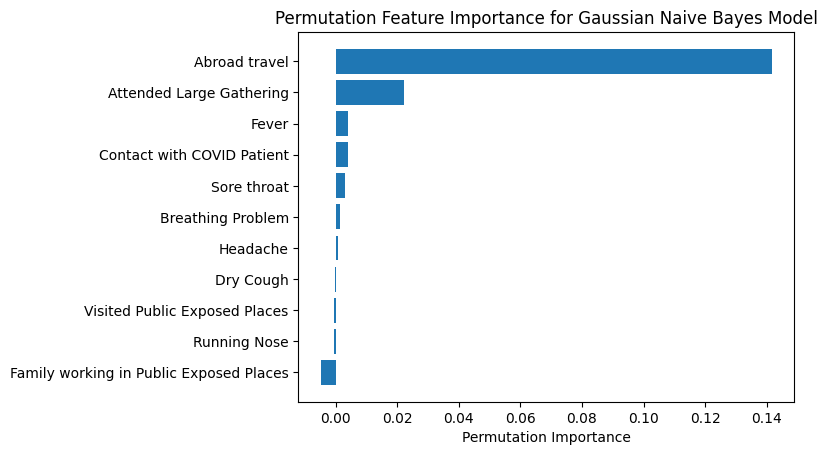

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.inspection import permutation_importance

# Fit the Gaussian Naive Bayes model
model_NB.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(model_NB, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importances and names
feature_importances = perm_importance.importances_mean
feature_names = X.columns

# Sort and plot feature importances
sorted_idx = feature_importances.argsort()
plt.barh(range(len(feature_names)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance for Gaussian Naive Bayes Model')
plt.show()

plt.savefig('NB models.png')


**K Nearest Neighbours Classifers**

Confusion Matrix:
[[199   4]
 [ 22 862]]


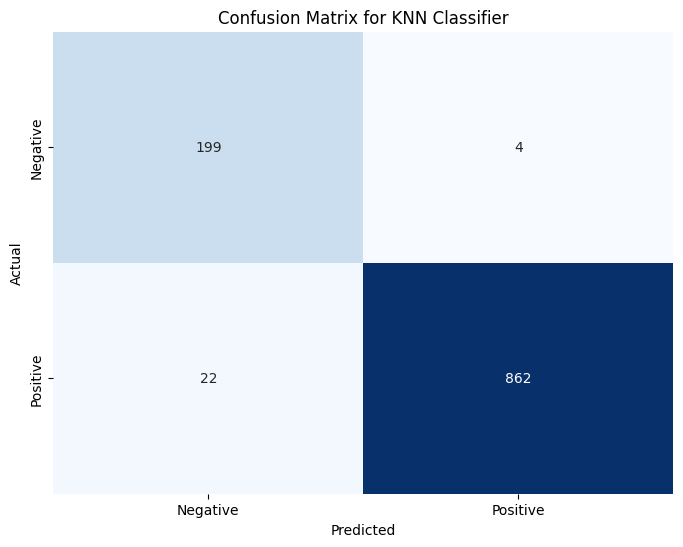

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your dataset loaded as X (features) and y (target)
# X should contain your selected columns

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNN classifier with a specified number of neighbors (k)
k = 5  # You can adjust this value based on your dataset and experimentation
model_KNN = KNeighborsClassifier(n_neighbors=k)

# Train the model
model_KNN.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_KNN.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


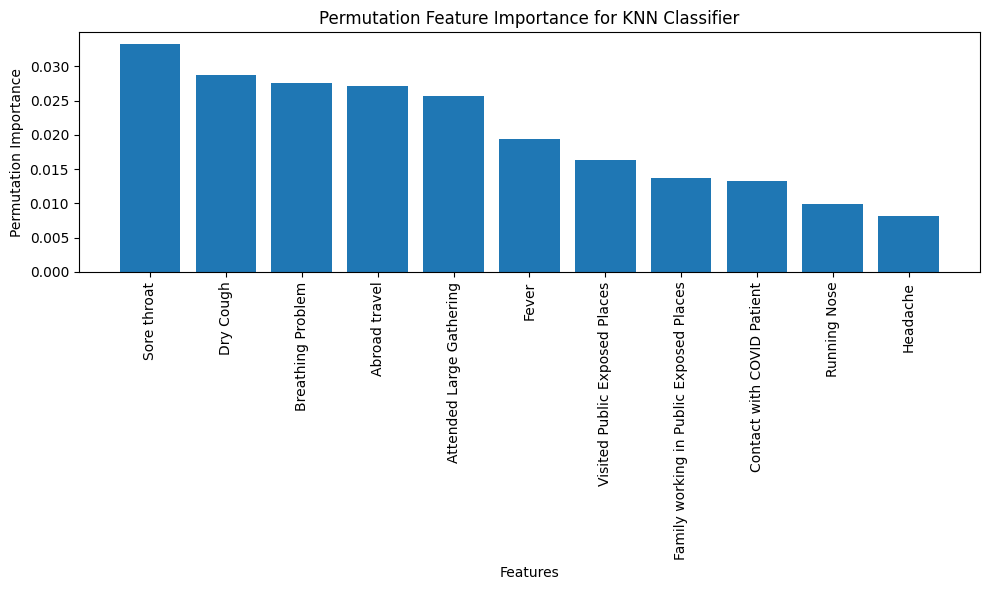

In [ ]:
import matplotlib.pyplot as plt

# Perform permutation feature importance
perm_importance = permutation_importance(model_KNN, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores
importance_scores = perm_importance.importances_mean

# Sort features based on importance scores
sorted_indices = importance_scores.argsort()[::-1]

# Get feature names
feature_names = X.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), importance_scores[sorted_indices], tick_label=feature_names[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance for KNN Classifier')
plt.tight_layout()
plt.show()




**XGBoost Classifiers**

Accuracy: 0.9779208831646734
Confusion Matrix:
[[188  15]
 [  9 875]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       203
           1       0.98      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.96      0.96      1087
weighted avg       0.98      0.98      0.98      1087



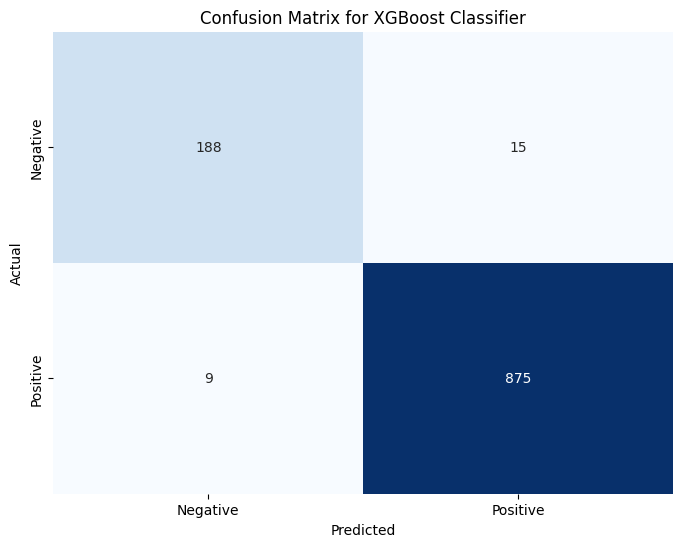

In [ ]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()



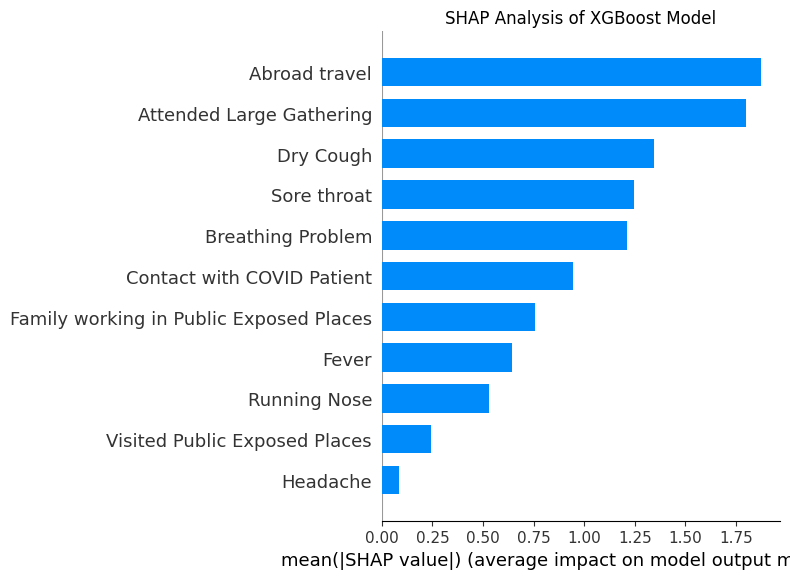

In [ ]:
import shap
import matplotlib.pyplot as plt

# Instantiate the SHAP explainer for the trained XGBoost model
explainer = shap.Explainer(model_xgb, X_train)

# Calculate SHAP values for a set of samples (e.g., the first 10 samples)
sample_indices = list(range(10))
shap_values = explainer.shap_values(X_test.iloc[sample_indices])

plt.title("SHAP Analysis of XGBoost Model")
# Plot the SHAP values for the first sample
shap.summary_plot(shap_values, X_test.iloc[sample_indices], feature_names=X.columns, plot_type="bar")

# Show the plot
plt.show()


**Accuracy metrics comparison**

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix

# Create a dictionary to store the results
results = {}

# Define a function to calculate specificity
def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return specificity

# Calculate metrics for each model
models = {
    'Logistic Regression': logreg_model,
    'Random Forest':model_Rf,
    'SVM': model_SVC,
    'KNN': model_KNN,
    'Naive Bayes': model_NB,
    'XGBoost': model_xgb,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Specificity': calculate_specificity(y_test, y_pred)
    }


results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Model'
print(results_df)

                       Recall  Precision  Accuracy  F1-Score  Specificity
Model                                                                    
Logistic Regression  0.990950   0.975501  0.972401  0.983165     0.891626
Random Forest        0.989819   0.983146  0.977921  0.986471     0.926108
SVM                  0.986425   0.983089  0.975161  0.984754     0.926108
KNN                  0.975113   0.995381  0.976081  0.985143     0.980296
Naive Bayes          0.725113   1.000000  0.776449  0.840656     1.000000
XGBoost              0.989819   0.983146  0.977921  0.986471     0.926108


**Execution time comparison**

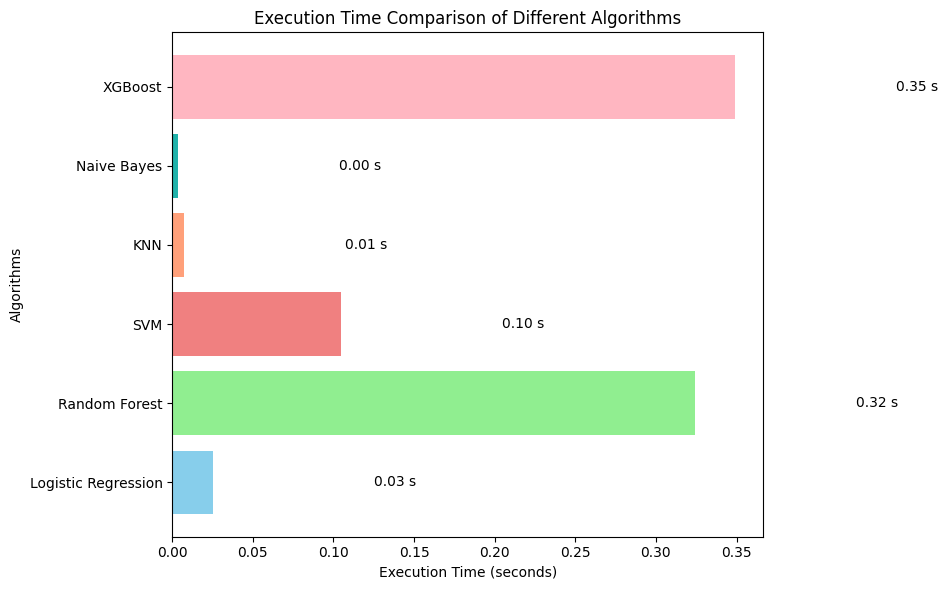

In [ ]:
import time
import matplotlib.pyplot as plt

# Initialize lists to store algorithm names and their corresponding times
algorithm_names = []
execution_times = []

# Define a function to measure execution time of a model
def measure_execution_time(model, name):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    algorithm_names.append(name)
    execution_times.append(execution_time)

# Measure execution time for each model
measure_execution_time(logreg_model, 'Logistic Regression')
measure_execution_time(model_Rf, 'Random Forest')
measure_execution_time(model_SVC, 'SVM')
measure_execution_time(model_KNN, 'KNN')
measure_execution_time(model_NB, 'Naive Bayes')
measure_execution_time(model_xgb, 'XGBoost')

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink']

# Create a bar plot with different colors for each model
plt.figure(figsize=(10, 6))
bars = plt.barh(algorithm_names, execution_times, color=colors)
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Algorithms')
plt.title('Execution Time Comparison of Different Algorithms')

# Add execution time labels to the bars
for bar, time_value in zip(bars, execution_times):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{time_value:.2f} s', va='center')

plt.tight_layout()

# Display the plot and save it
plt.savefig('Execution Time Comparison of Different Algorithms.png')
plt.show()

**ROC AUC Score & Curve**

Logistic Regression ROC AUC Score: 0.9950
Random Forest ROC AUC Score: 0.9982
SVM ROC AUC Score: 0.9920
KNN ROC AUC Score: 0.9967
Naive Bayes ROC AUC Score: 0.9942
XGBoost ROC AUC Score: 0.9980


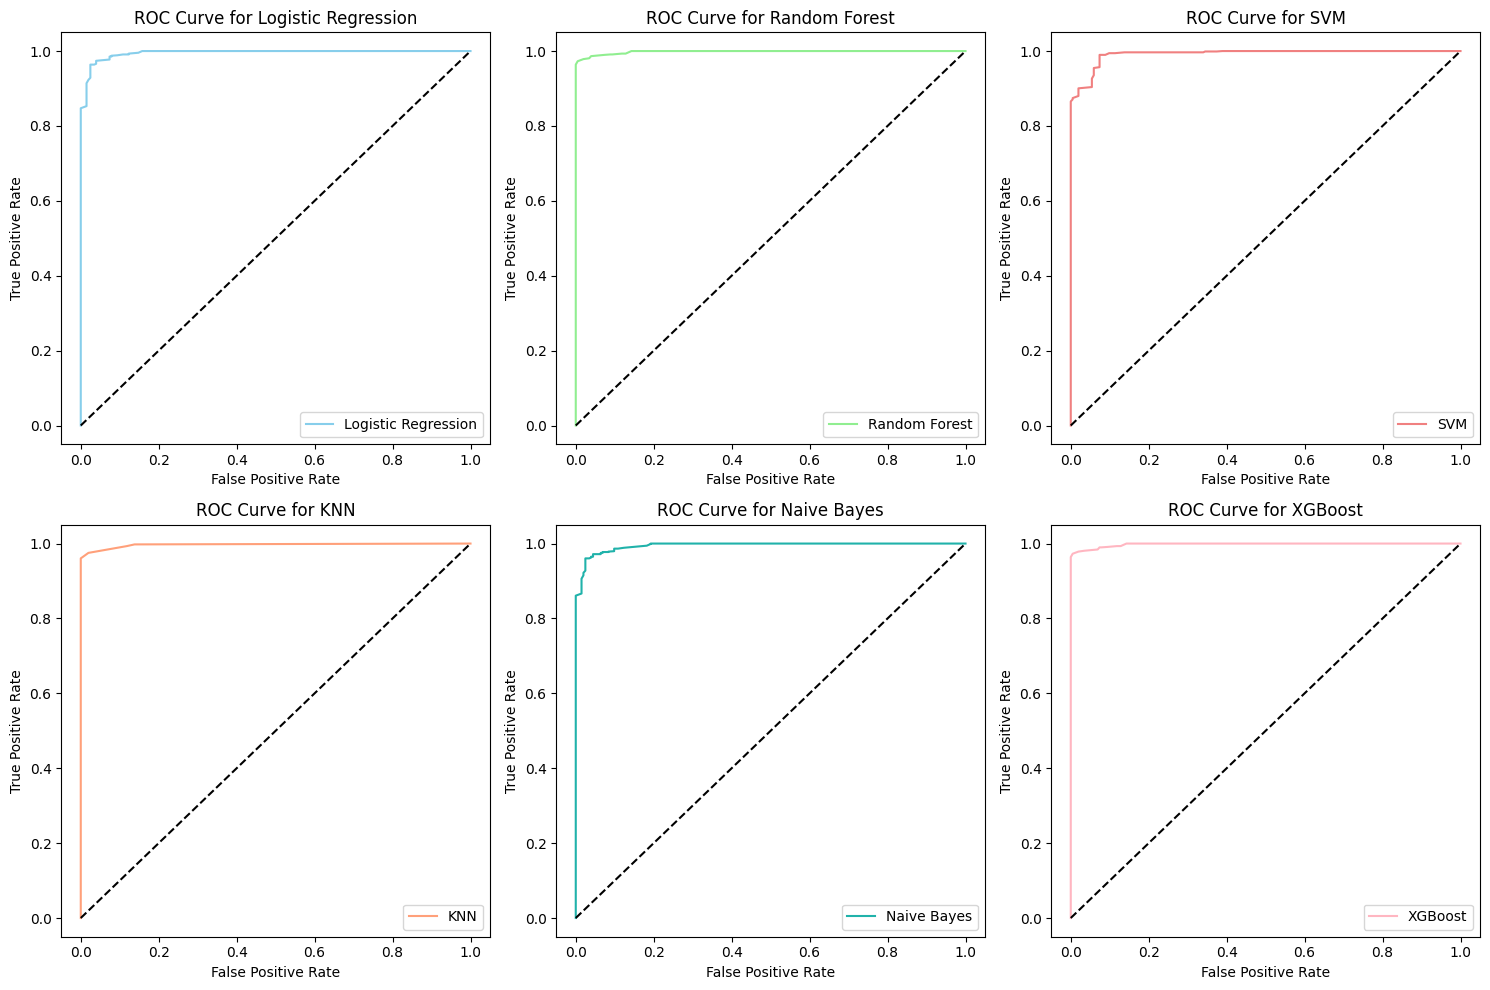

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define a function to plot ROC curve for a model
def plot_roc_curve(model, name, ax, color):
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    ax.plot(fpr, tpr, label=name, color=color)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {name}')
    ax.legend()

    # Calculate and print the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_score)
    print(f'{name} ROC AUC Score: {roc_auc:.4f}')

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink']

# Create subplots for ROC curves
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Inside the loop where you plot the ROC curves:
plot_roc_curve(logreg_model, 'Logistic Regression', axs[0], colors[0])
plot_roc_curve(model_Rf, 'Random Forest', axs[1], colors[1])
plot_roc_curve(model_SVC, 'SVM', axs[2], colors[2])
plot_roc_curve(model_KNN, 'KNN', axs[3], colors[3])
plot_roc_curve(model_NB, 'Naive Bayes', axs[4], colors[4])
plot_roc_curve(model_xgb, 'XGBoost', axs[5], colors[5])

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('ROC Curve for all algorithms.png')
plt.show()


**Precision Recall Curve**

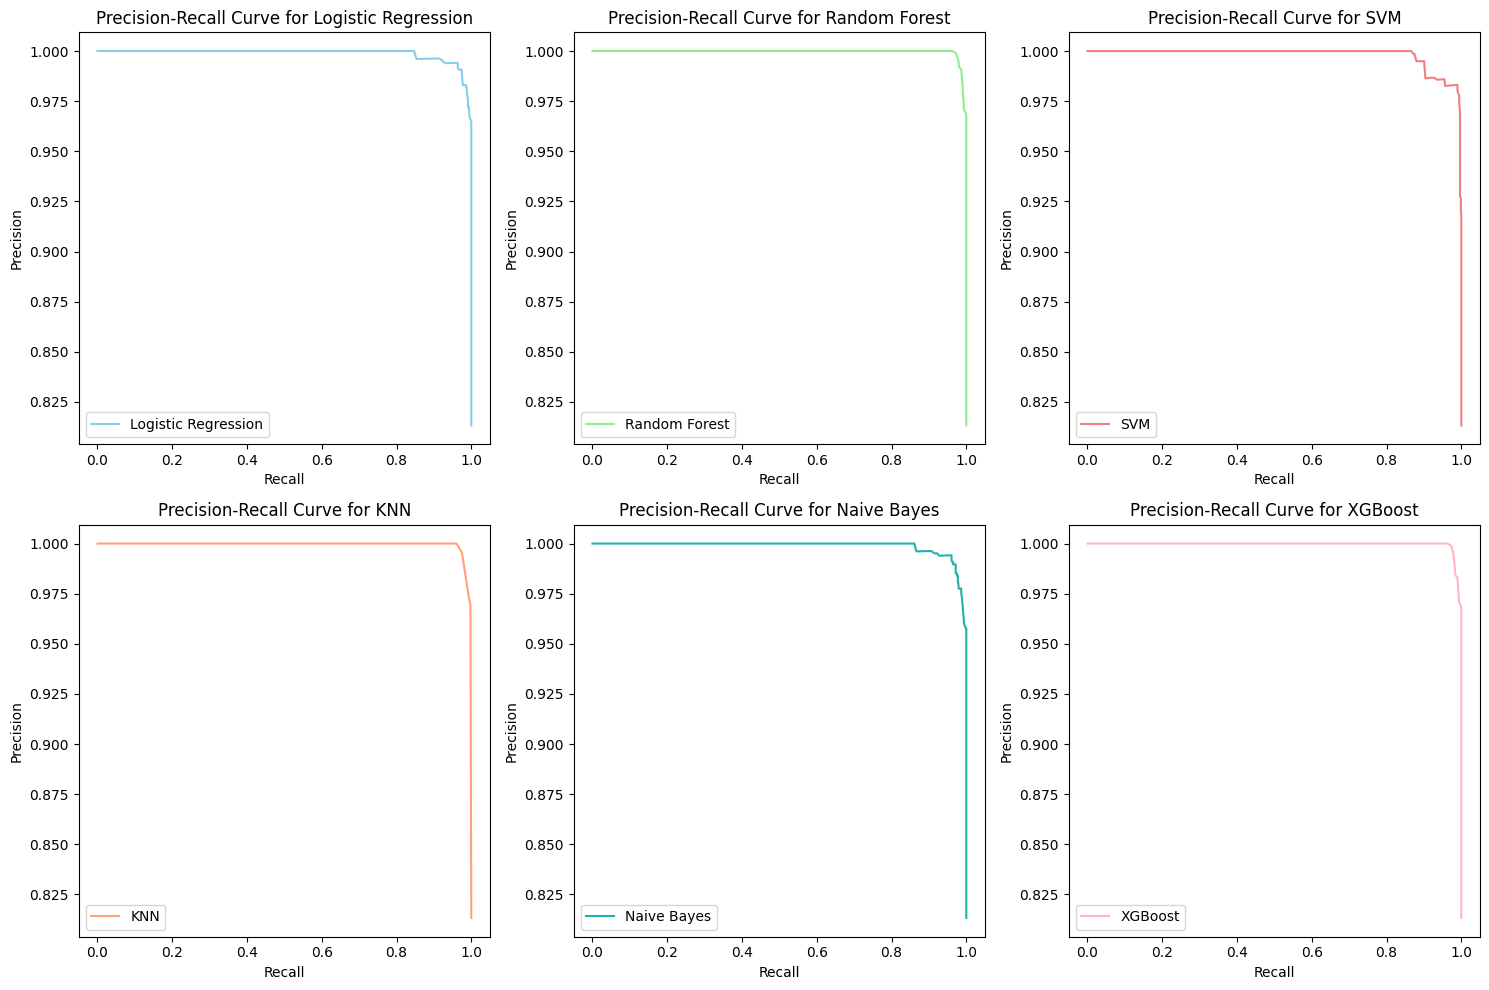

In [ ]:
from sklearn.metrics import precision_recall_curve

# Define a function to plot precision-recall curve for a model
def plot_precision_recall_curve(model, name, ax, color):
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    ax.plot(recall, precision, label=name, color=color)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {name}')
    ax.legend()

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink']

# Create subplots for Precision-Recall curves
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()


# Plot Precision-Recall curves for each model with different colors
plot_precision_recall_curve(logreg_model, 'Logistic Regression', axs[0], colors[0])
plot_precision_recall_curve(model_Rf, 'Random Forest', axs[1], colors[1])
plot_precision_recall_curve(model_SVC, 'SVM', axs[2], colors[2])
plot_precision_recall_curve(model_KNN, 'KNN', axs[3], colors[3])
plot_precision_recall_curve(model_NB, 'Naive Bayes', axs[4], colors[4])
plot_precision_recall_curve(model_xgb, 'XGBoost', axs[5], colors[5])

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('Precision-Recall Curve.png')
plt.show()

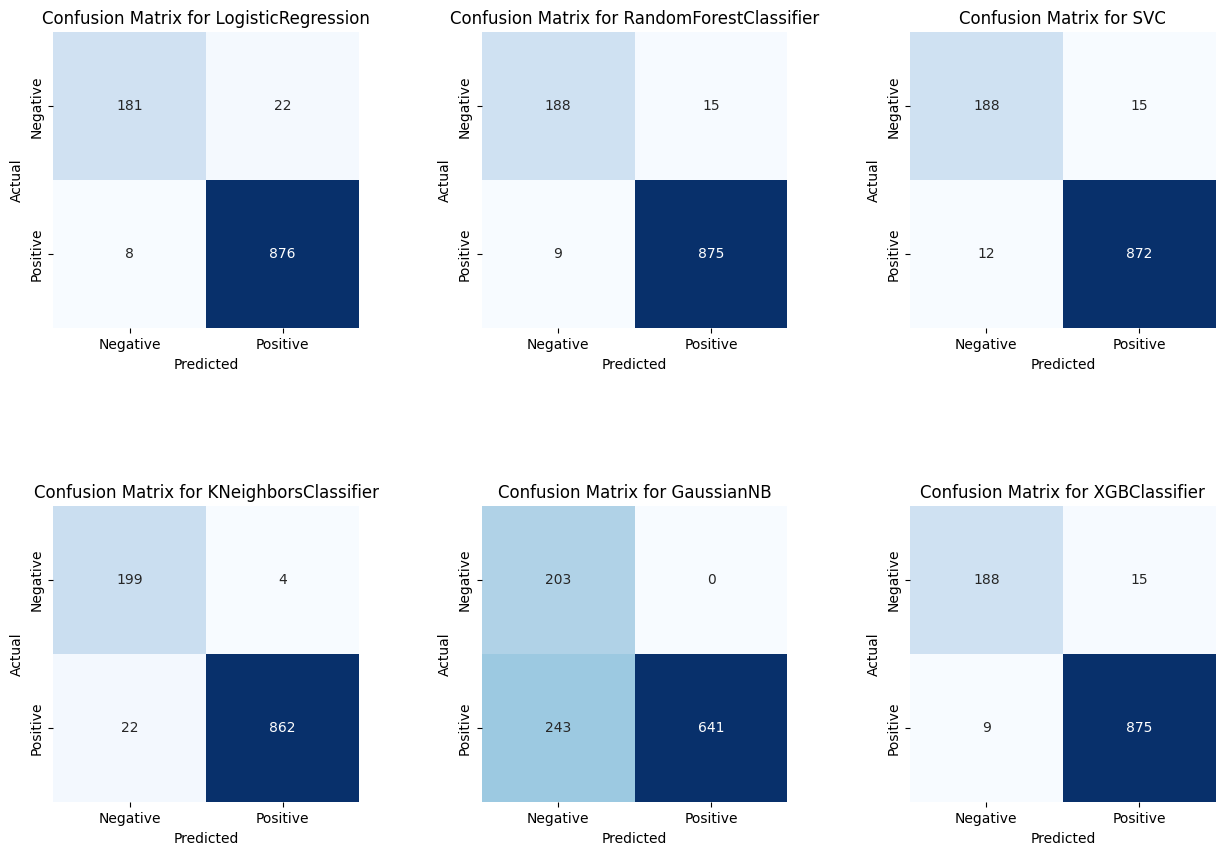

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Instantiate the classifiers
classifiers = [
    logreg_model, model_Rf, model_SVC, model_KNN, model_NB, model_xgb
]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Iterate through classifiers and plot confusion matrices
for i, model in enumerate(classifiers):
    row = i // 3
    col = i % 3
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[row, col])
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')
    axes[row, col].set_title(f'Confusion Matrix for {model.__class__.__name__}')
    axes[row, col].set_xticks([0.5, 1.5])
    axes[row, col].set_yticks([0.5, 1.5])
    axes[row, col].set_xticklabels(['Negative', 'Positive'])
    axes[row, col].set_yticklabels(['Negative', 'Positive'])

plt.show()


In [ ]:
pip install colorama

In [ ]:
import colorama
from colorama import Fore

print("Covid-19 prediction based on machine learning algorithms")
print("Enter 1 for Yes and 0 for No")

def get_input(prompt):
    while True:
        user_input = input(prompt)
        if user_input == '0' or user_input == '1':
            return int(user_input)
        else:
            print("Invalid input. Please enter 0 or 1.")

# Get user inputs
Breathing_Problem = get_input("Does the patient have breathing problem? ")
Fever = get_input("Is the patient having a fever? ")
Dry_Cough = get_input("Is the patient experiencing a dry cough? ")
Sore_throat = get_input("Is the patient having a sore throat? ")
Running_Nose = get_input("Is the patient experiencing a running nose? ")
Headache = get_input("Is the patient experiencing a headache? ")
Abroad_travel = get_input("Has the patient traveled abroad recently? ")
Contact_with_COVID_Patient = get_input("Was the patient in contact with a COVID patient recently? ")
Attended_Large_Gathering = get_input("Did the patient attend any large gathering event recently? ")
Visited_Public_Exposed_Places = get_input("Did the patient visit any public exposed places recently? ")
Family_working_in_Public_Exposed_Places = get_input("Is there any family member of the patient who works in places with public exposure? ")

# Prepare input data
patient = [[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Running_Nose, Headache,Abroad_travel, Contact_with_COVID_Patient, Attended_Large_Gathering, Visited_Public_Exposed_Places, Family_working_in_Public_Exposed_Places]]

# Predict using the best KNN model
result = model_KNN.predict(patient)

# Print results
if result == 1:
    print("It's possible that you have been exposed to the COVID-19 virus. It's recommended to undergo an RT-PCR test immediately and self-isolate for a period of 14 days.")
else:
    print("You are not showing any signs of COVID-19. It's advisable to remain at home and prioritize your safety.")

Covid-19 prediction based on machine learning algorithms
Enter 1 for Yes and 0 for No
Does the patient have breathing problem? 0
Is the patient having a fever? 0
Is the patient experiencing a dry cough? 0
Is the patient having a sore throat? 0
Is the patient experiencing a running nose? 0
Is the patient experiencing a headache? 1
Has the patient traveled abroad recently? 0
Was the patient in contact with a COVID patient recently? 1
Did the patient attend any large gathering event recently? 0
Did the patient visit any public exposed places recently? 1
Is there any family member of the patient who works in places with public exposure? 0
You are not showing any signs of COVID-19. It's advisable to remain at home and prioritize your safety.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
